In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import GroverOperator
from qiskit.visualization import plot_histogram


In [2]:
def puzzle():
    circuit = QuantumCircuit(3,3)
    circuit.cx(0,1)
    circuit.cx(1,2)
    circuit.h(1)
    circuit.h(2)
    circuit.h(0)
    orcale = QuantumCircuit(3)
    orcale.z(0)
    orcale_gate = orcale.to_gate(label = "Oracle")
    groveoperator = GroverOperator(orcale)
    circuit.append(groveoperator, range(3))
    circuit.measure(range(3), range(3))
    return circuit


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_7884\780430552.py:11: DeprecationWarning: The class ``qiskit.circuit.library.grover_operator.GroverOperator`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.grover_operator instead.
  groveoperator = GroverOperator(orcale)


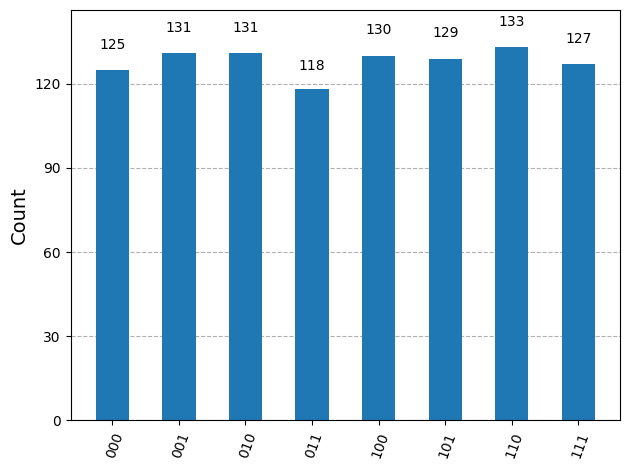

In [3]:
circuit = puzzle()
backend = AerSimulator()
compiled_circuit = transpile(circuit, backend)
result = backend.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)
